In [332]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import warnings
import seaborn as sns
warnings.filterwarnings("ignore") # IGNORE AND SUSPEND ALL WARNINGS MESSAGES THEY WILL NOT BE DISPLAYED ON THE SCREEN 

In [333]:
df = pd.read_csv("data/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


checking for null values

In [334]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

##### checking for duplicate values

In [335]:
df.duplicated().sum()

0

In [336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [337]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [338]:
print("UNIQUE CATAGORIES IN CATAGORICAL COLUMN")

catagorical_features = [feature for feature in df.columns if df[feature].dtypes == "O" ]
numeric_feature = [feature for feature in df.columns if df[feature].dtype != "O"]

print("FEATURE    :    UNIQUE CATAGORY")
for feature in catagorical_features:
    print(feature ," : " ,df[feature].unique())


UNIQUE CATAGORIES IN CATAGORICAL COLUMN
FEATURE    :    UNIQUE CATAGORY
gender  :  ['female' 'male']
race/ethnicity  :  ['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education  :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch  :  ['standard' 'free/reduced']
test preparation course  :  ['none' 'completed']


Adding column for the 'total score' and 'average score'

In [339]:
df["Total_score"] = df["math score"] + df["reading score"] + df['writing score']
df['Average_score'] = df['Total_score']/3

In [340]:
reading_full = df[df['reading score'] == 100]['Average_score'].count()
writing_full = df[df['writing score'] == 100]['Average_score'].count()
math_full = df[df['math score'] == 100]['Average_score'].count()

print("Total number of student will full marks in reading  : ", reading_full)
print("Total number of student will full marks in writing  : ", writing_full)
print("Total number of student will full marks in math     : ", math_full)

Total number of student will full marks in reading  :  17
Total number of student will full marks in writing  :  14
Total number of student will full marks in math     :  7


In [341]:
reading_less_20 = df[df["reading score"] <= 20]["Average_score"].count()
writing_less_20 = df[df["writing score"] <= 20]["Average_score"].count()
math_less_20    = df[df["math score"] <= 20]["Average_score"].count()

print("Total number of student with score less than 20 in reading : ", reading_less_20)
print("Total number of student with score less than 20 in writing : ", writing_less_20)
print("Total number of student with score less than 20 in math    : ", math_less_20)

Total number of student with score less than 20 in reading :  1
Total number of student with score less than 20 in writing :  3
Total number of student with score less than 20 in math    :  4


plotting an histogram with respect to the gender

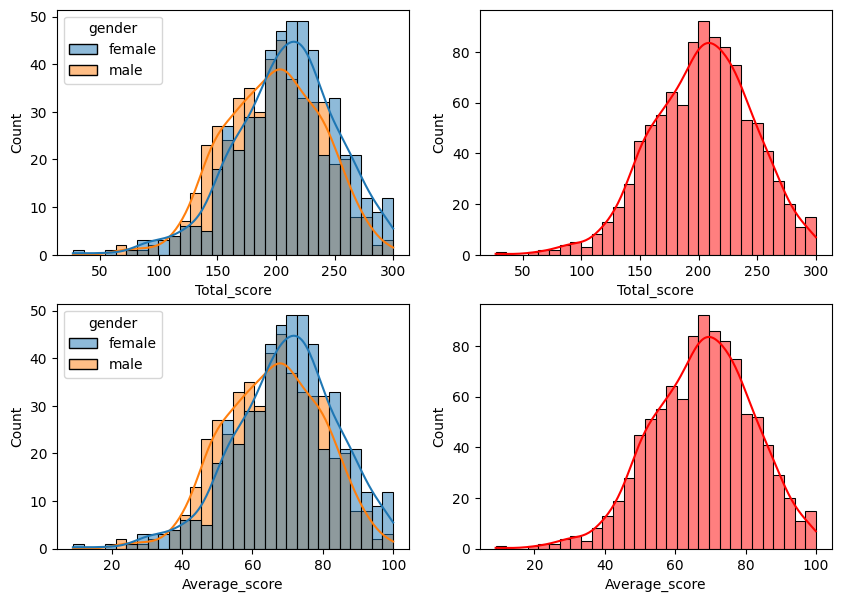

In [342]:
plt.subplots(2,2,figsize=(10,7))

sns.histplot(data  = df,
            x      = 'Average_score',
            bins   = 30,
            kde    = True,
            color  = 'r')
plt.subplot(223)

sns.histplot(data  = df,
            x      = "Average_score",
            bins   = 30,
            kde    = True,
            hue    = 'gender')
plt.subplot(222)

sns.histplot(data  = df,
            x      = 'Total_score',
            bins   = 30,
            kde    = True,
            color  = 'r')
plt.subplot(221)

sns.histplot(data  = df,
            x      = 'Total_score',
            bins   = 30,
            kde    = True,
            hue    = 'gender')
plt.subplot(224)

plt.show()

INSIGHTS

From the above graph we can see that the Average and Total score of FEMALE students perform well compared to male 

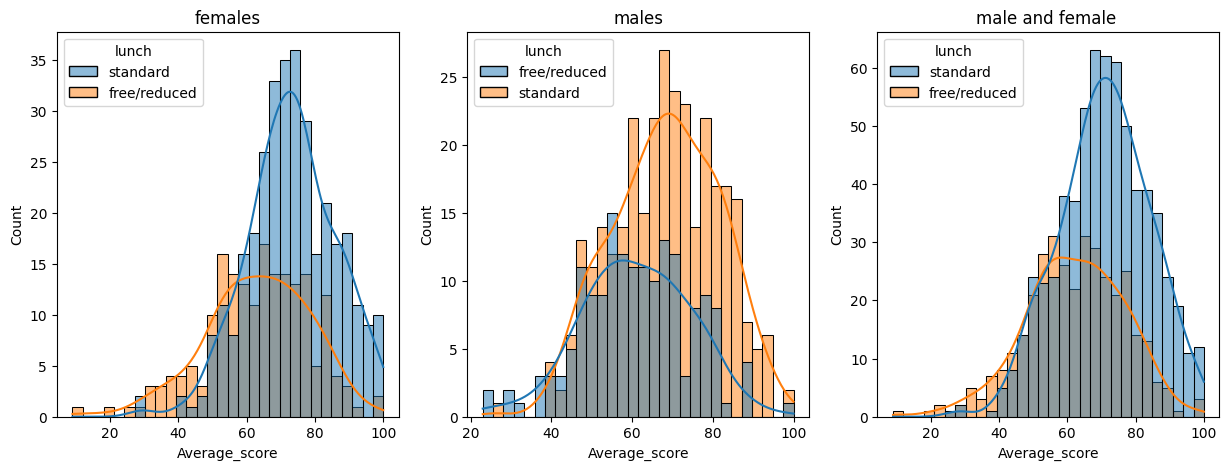

In [343]:
plt.subplots(1,3,figsize=(15,5))

sns.histplot(data  = df,
            x      = 'Average_score',
            bins   = 30,
            kde    = True,
            hue    ='lunch'
            )
plt.title("male and female ")
plt.subplot(131)

sns.histplot(data = df[df['gender'] == "female"],
            x     = 'Average_score',
            bins  = 30,
            kde   = True,
            hue   ='lunch')
plt.title("females")
plt.subplot(132)

sns.histplot(data = df[df['gender'] == 'male'],
            x     = 'Average_score',
            bins  = 30,
            kde   = True,
            hue   = "lunch")
plt.title("males")
plt.show()

INSIGHTS 

from standard lunch we can conclude that the average score is higher

[]

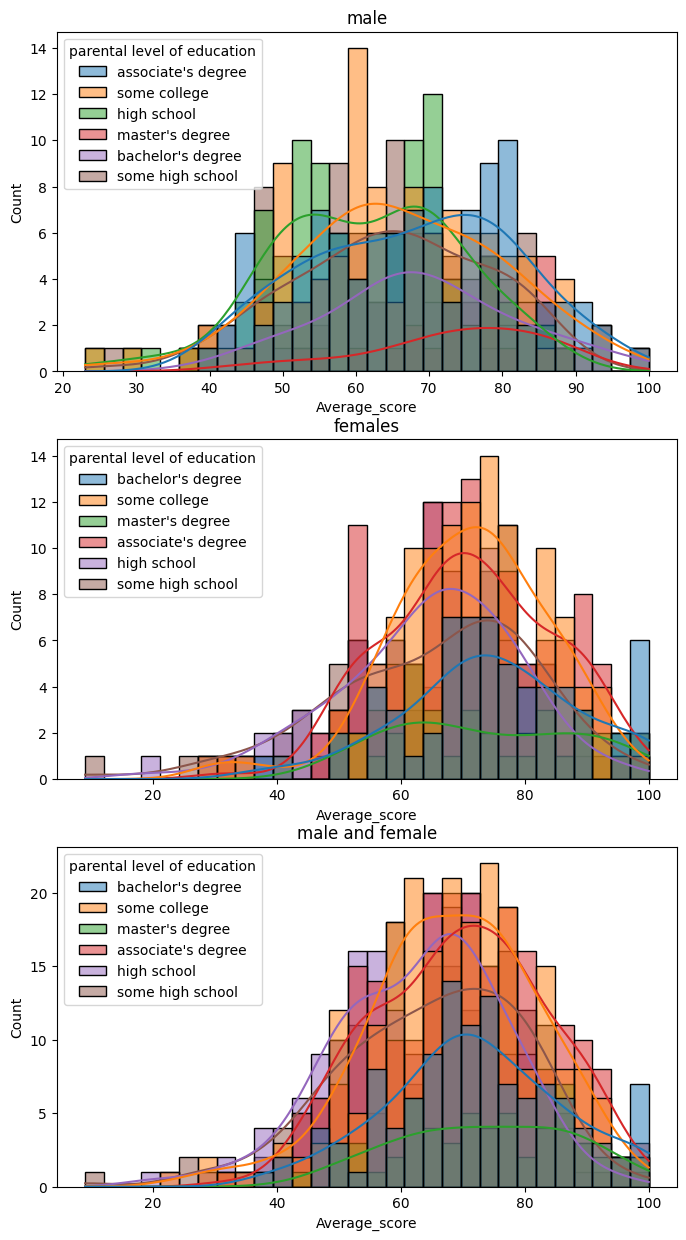

In [344]:
plt.subplots(3,1,figsize=(8,15))

sns.histplot(data = df,
             x    = 'Average_score',
             bins = 30,
             kde  = True,
             hue  = "parental level of education")
plt.title("male and female")
plt.subplot(311)


sns.histplot(data  = df[df['gender'] == 'male'],
            x      = "Average_score",
            bins   = 30,
            kde    = True,
            hue    = "parental level of education",
)
plt.title("male")
plt.subplot(312)

sns.histplot(data  = df[df['gender'] == 'female'],
            x      = "Average_score",
            kde    = True,
            hue    = 'parental level of education',
            bins   = 30)
plt.title("females")
plt.subplot(313)

plt.plot()

INSIGHTS

from the above graph we see that the parents who have graducted from an unknown colage there children have a slight;y hight average score than the students whose parenst have graduated from any other colage let it be male or female.

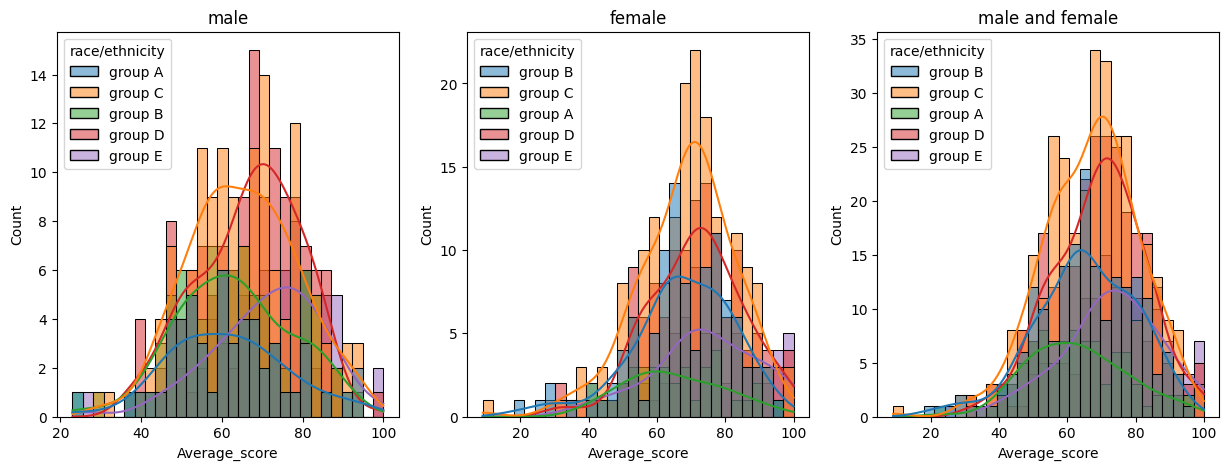

In [345]:
plt.subplots(1,3,figsize=(15,5))

sns.histplot(data = df,
            x = "Average_score",
            kde = True,
            hue = "race/ethnicity",
            bins = 30)
plt.title("male and female")
plt.subplot(131)

sns.histplot(data = df[df['gender'] == 'male'],
            x = "Average_score",
            bins = 30,
            hue = "race/ethnicity",
            kde = True)
plt.title("male")
plt.subplot(132)

sns.histplot(data = df[df['gender'] == 'female'],
            x = "Average_score",
            bins = 30,
            hue = "race/ethnicity",
            kde = True)
plt.title("female")
plt.subplot(133)
plt.show()

INSIGHTS           

------------------  high score    |     low score 

Females------------------- C         |       A 

male---------------------- D         |       A 

male and female group-- C         |       A 

-----------------------------------------------------------------------------------------------------------------------------------------------

Maximum score of student in each subject

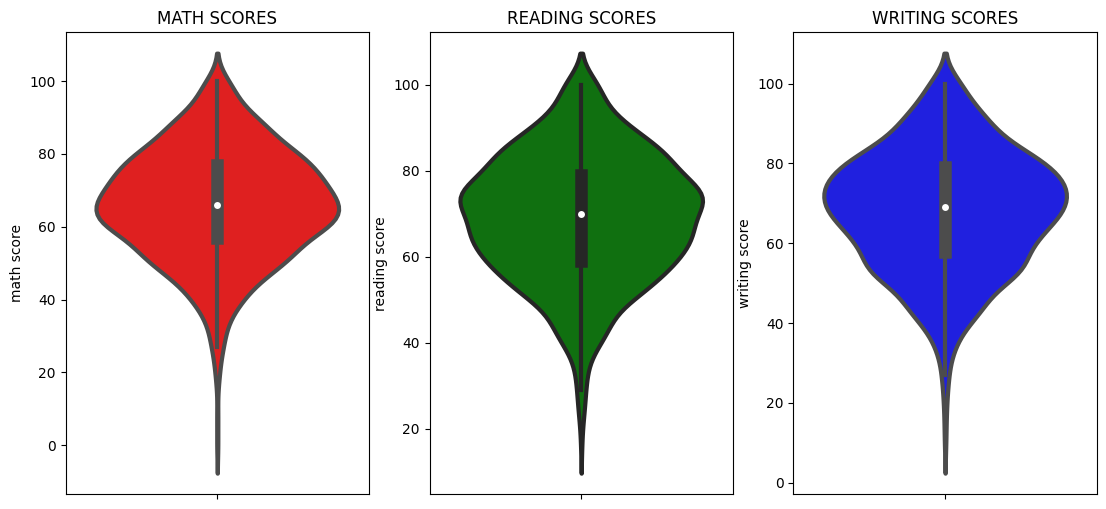

In [346]:
plt.figure(figsize=(18,6))

plt.subplot(141)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)

plt.subplot(142)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)

plt.subplot(143)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)

plt.show()

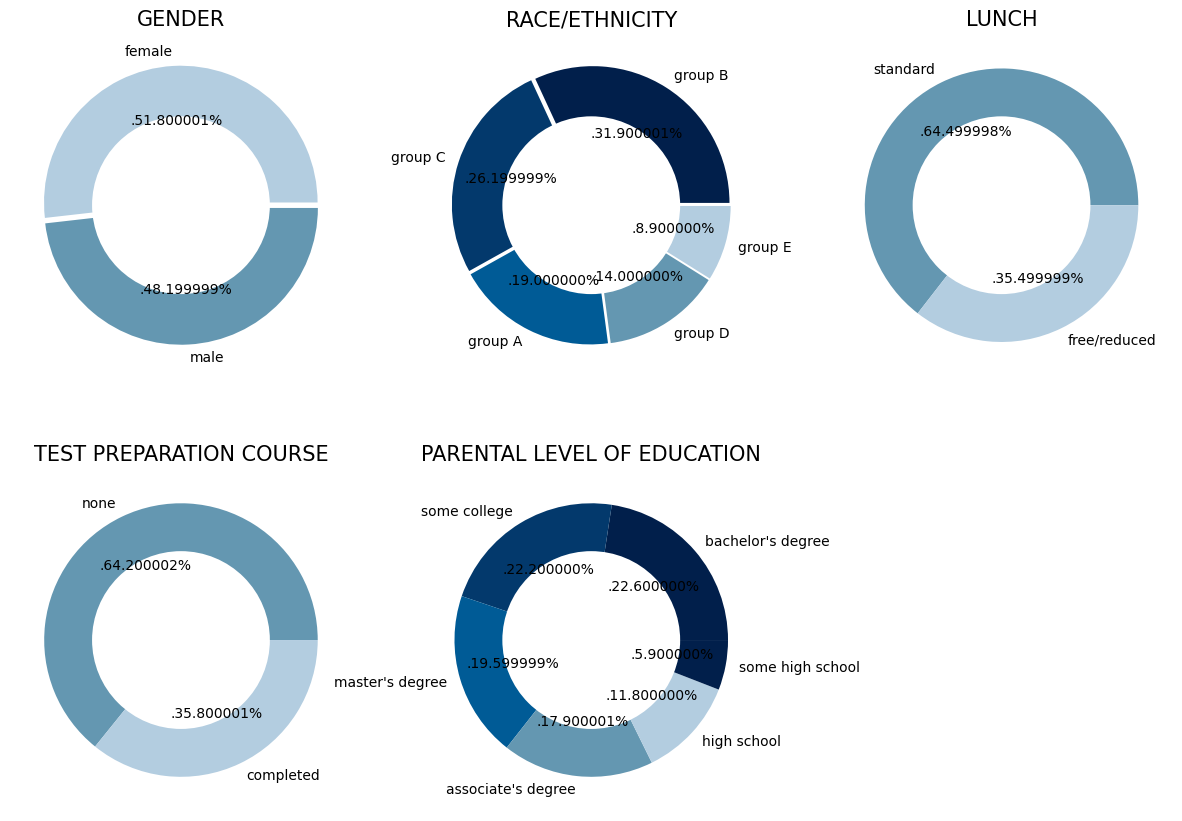

In [347]:
plt.figure(figsize=(15, 16))

plt.subplot(331)
color = ['#b3cde0','#6497b1']
plt.pie(df['gender'].value_counts(), 
        colors   =   color, 
        labels   =   df['gender'].unique(),
        autopct  =   '.%2f%%',
        explode=[0.02, 0.02] # ADD SPACES BETWEEN THE ARCS
        )
plt.title('GENDER', fontsize = 15)
hole = plt.Circle((0, 0),  # CENTER COORDINATE 
                0.65,      # RADIUS 
                facecolor='white')
plt.gcf().gca().add_artist(hole)

# plt.gcf() -> GETS THE CURRENT FIGURE WHICH, OBTAINS THE REFERENCE TO THE CURRENT FIGURE WHICH ALLOWS TO MODIFY AND ADD ELEMENT 
# TO THE ENTIRE CANVAS

# gca() -> GET CURRENT AXIS , OBTAIN A REFERENCE TO THE CURRENT AXIS WITHIN THE CURRENT FIGURE

plt.subplot(332)
color = ["#011f4b" , "#03396c" , "#005b96" , "#6497b1" , "#b3cde0"]
plt.pie(df["race/ethnicity"].value_counts(),
        colors   =    color,
        labels   =    df['race/ethnicity'].unique(),
        autopct  =   '.%2f%%',
        explode  =   [0.02,0.02,0.02,0.02,0.02] )
plt.title("RACE/ETHNICITY",fontsize=15)
hole1 = plt.Circle((0,0),0.65,facecolor='white')
plt.gcf().gca().add_artist(hole1)

plt.subplot(333)
color = ["#6497b1" ,"#b3cde0"]
plt.pie(df["lunch"].value_counts(),
        colors  =    color,
        labels  =    df["lunch"].unique(),
        autopct =    '.%2f%%')
plt.title("LUNCH",fontsize=15)
hole2 = plt.Circle((0,0),0.65,facecolor='white')
plt.gcf().gca().add_artist(hole2)

plt.subplot(334)
color = ["#6497b1" ,"#b3cde0"]
plt.pie(df["test preparation course"].value_counts(),
        colors   =   color,
        labels   =   df['test preparation course'].unique(),
        autopct  =   '.%2f%%')
plt.title("TEST PREPARATION COURSE", fontsize=15)
hole3 = plt.Circle((0,0),0.65,facecolor='white')
plt.gcf().gca().add_artist(hole3)

plt.subplot(335)
color = ["#011f4b" , "#03396c" , "#005b96" , "#6497b1" , "#b3cde0"]
plt.pie(df['parental level of education'].value_counts(),
        colors  =  color,
        labels  =  df["parental level of education"].unique(),
        autopct = '.%2f%%')
plt.title("PARENTAL LEVEL OF EDUCATION", fontsize=15)
hole4 = plt.Circle((0,0),0.65,facecolor="white")
plt.gcf().gca().add_artist(hole4)


INFERENCE 

1) Number of female student are more compared to male
2) Group c has the most number of student
3) Most student prefer standard lunch
4) Most student have not enrolled for any test preparation 
5) Stdent whose parental education is from "some college" is the greatest

UNIVARIANT ANALYSIS

Seeing the distribution of the gender

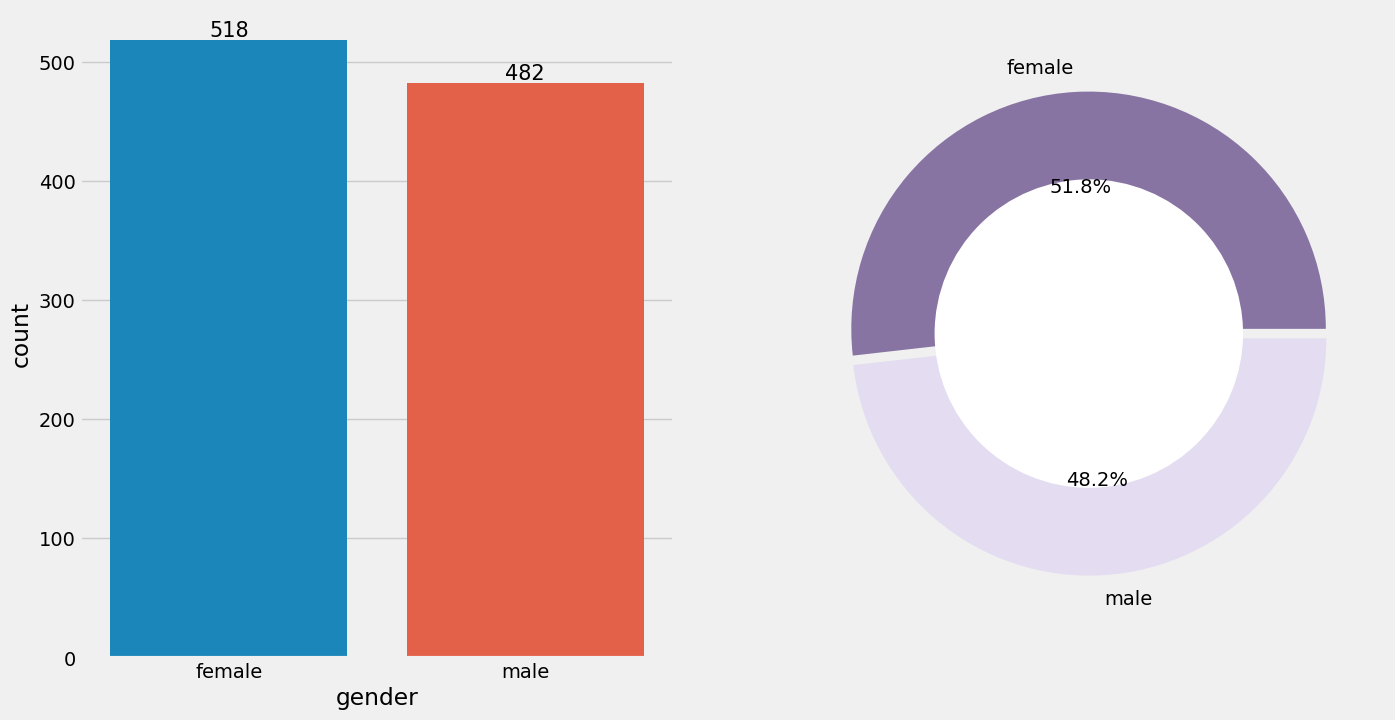

In [369]:
f,ax=plt.subplots(1,2,figsize=(15,8))
sns.countplot(x=df['gender'],data=df,ax=ax[0])

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

plt.pie(df["gender"].value_counts(),
        labels=df["gender"].unique(),
        explode=[0.02,0.02],
        # shadow=True,
        autopct = "%2.1f%%",
        colors=['#8874a3','#e4dcf1'])

hole = plt.Circle((0,0),0.65,facecolor="white")
plt.gcf().gca().add_artist(hole)


INSIGHTS 

Gender has a balamced data 

male - 482(48.2%)

female - 518(51.8%)

UNIVARIANT ANALYSIS 

How is group wise distributed

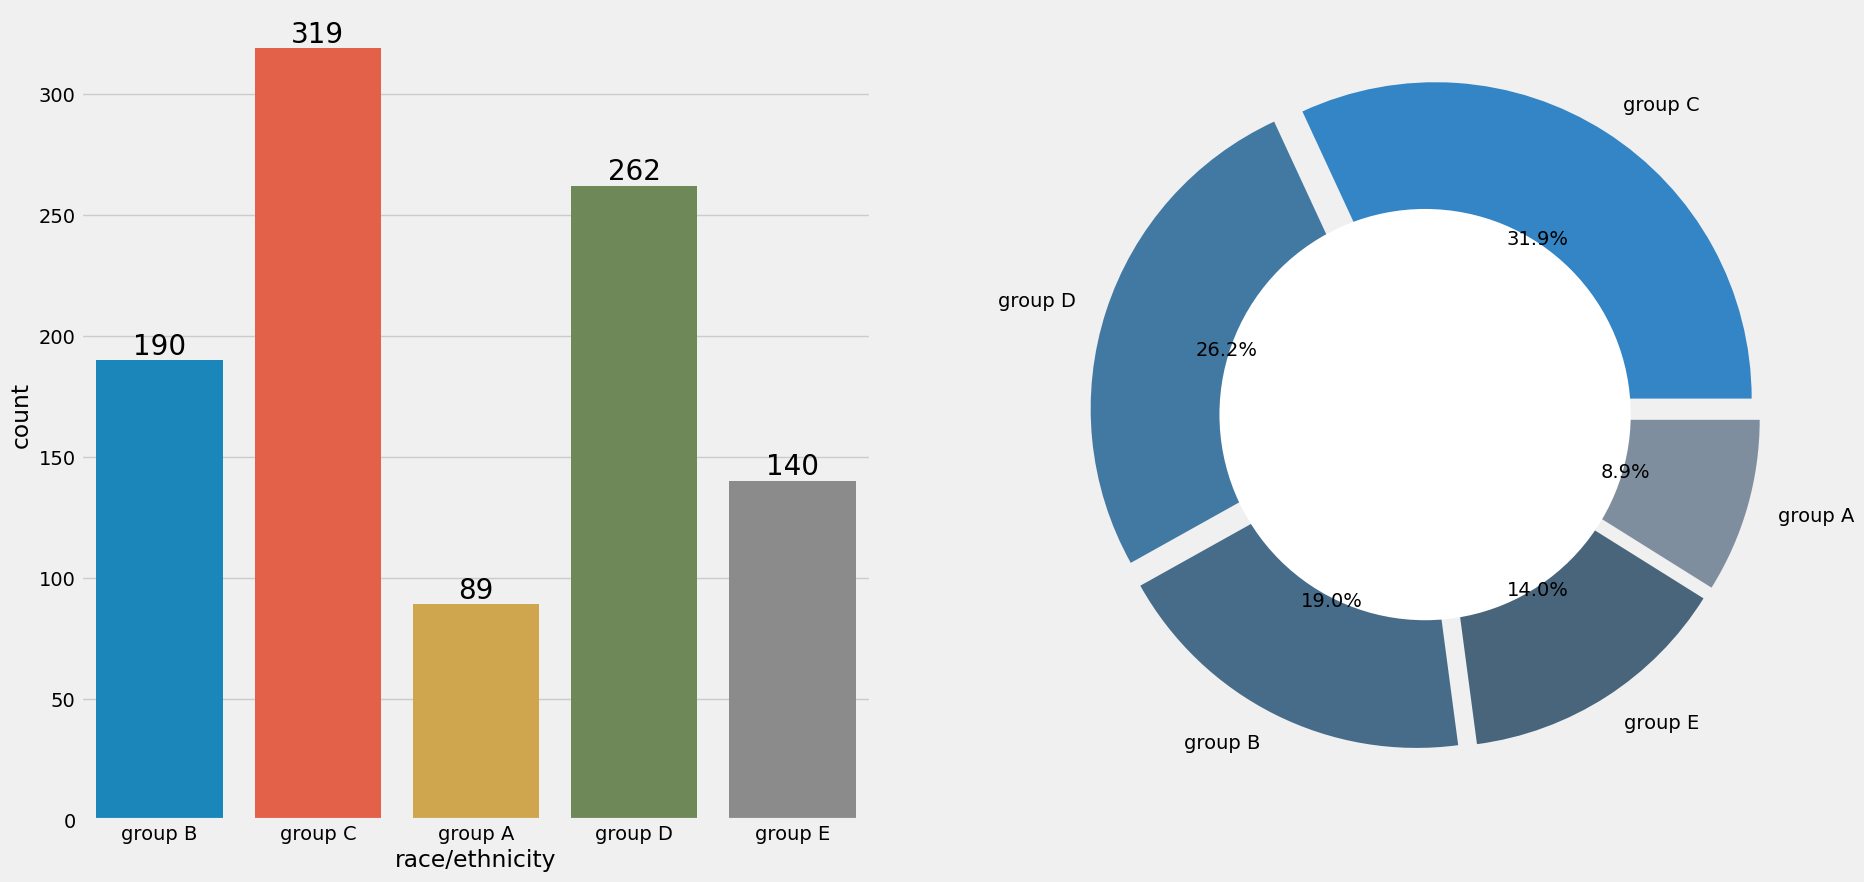

In [383]:
f,ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x = df["race/ethnicity"],
            data = df,
            ax=ax[0])

for container in ax[0].containers:
    ax[0].bar_label(container,color="black",size=20)

plt.pie(x= df['race/ethnicity'].value_counts(),
        labels = df['race/ethnicity'].value_counts().index,
        explode = [0.06,0.06,0.06,0.06,0.06],
        autopct= "%1.1f%%",
        colors = ["#3385c6" , "#4279a3" , "#476c8a" , "#49657b" , "#7f8e9e"])

hole = plt.Circle((0,0),0.65,facecolor="white")
plt.gcf().gca().add_artist(hole)


INSIGHTS 

Most number of student belong to group C and D 

Least number of stuent belong to group A and E

BIVARIENT ANALYSIS

Does race/ehnicity has any impact on student's performance

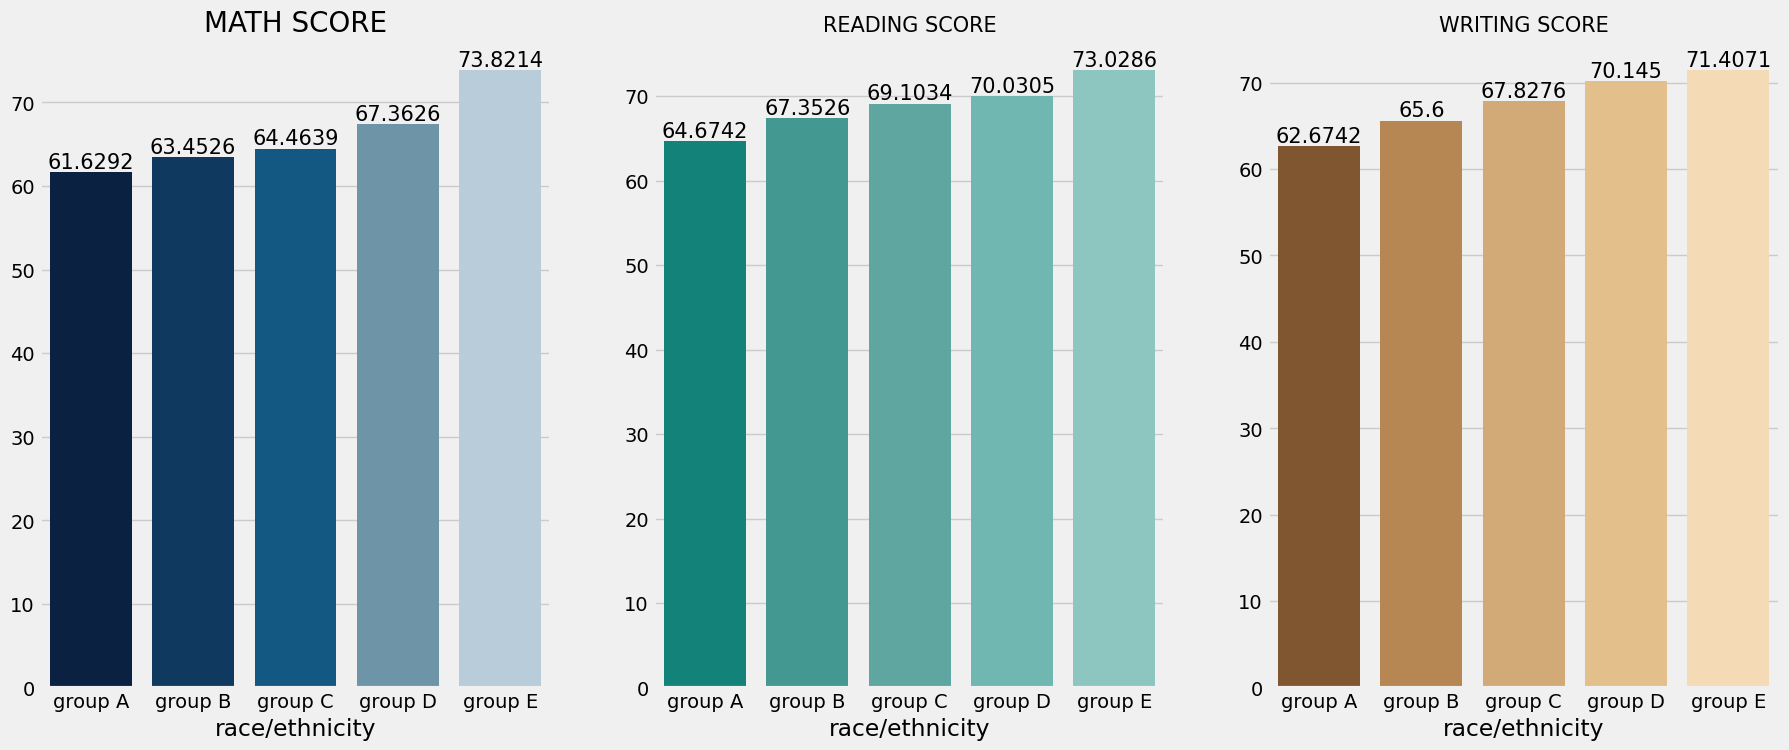

In [444]:
group_data2 = df.groupby("race/ethnicity")
f,ax = plt.subplots(1,3,figsize=(20,8))

sns.barplot(x       = group_data2["math score"].mean().index, 
            y       = group_data2['math score'].mean().values,
            ax      = ax[0],
            palette = ["#011f4b" , "#03396c" , "#005b96" ,"#6497b1" , "#b3cde0"])
ax[0].set_title("MATH SCORE",size=20)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

# print(group_data2['math score'].mean().index)
# print(group_data2['math score'].mean().values)

sns.barplot(x       = group_data2["reading score"].mean().index,
            y       = group_data2["reading score"].mean().values,
            ax      = ax[1],
            palette = ["#009688" , "#35a79c", "#54b2a9" , "#65c3ba" , "#83d0c9"]
            )
ax[1].set_title("READING SCORE",size=15)
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)


sns.barplot(x       = group_data2["writing score"].mean().index,
            y       = group_data2["writing score"].mean().values,
            ax      = ax[2],
            palette = ["#8d5524" ,"#c68642" , "#e0ac69" , "#f1c27d" , "#ffdbac"])
ax[2].set_title("WRITING SCORE",size=15)
for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

INSIGHTS 

group E has scored the higest in all the subjects 

group A has scored the least in all the subjects 

------------------------------------------------------------------------------------------------------------------------------------

UNIVARIANT ANALYSIS 

Having a count on the number of parents that have different qualifications in different collages

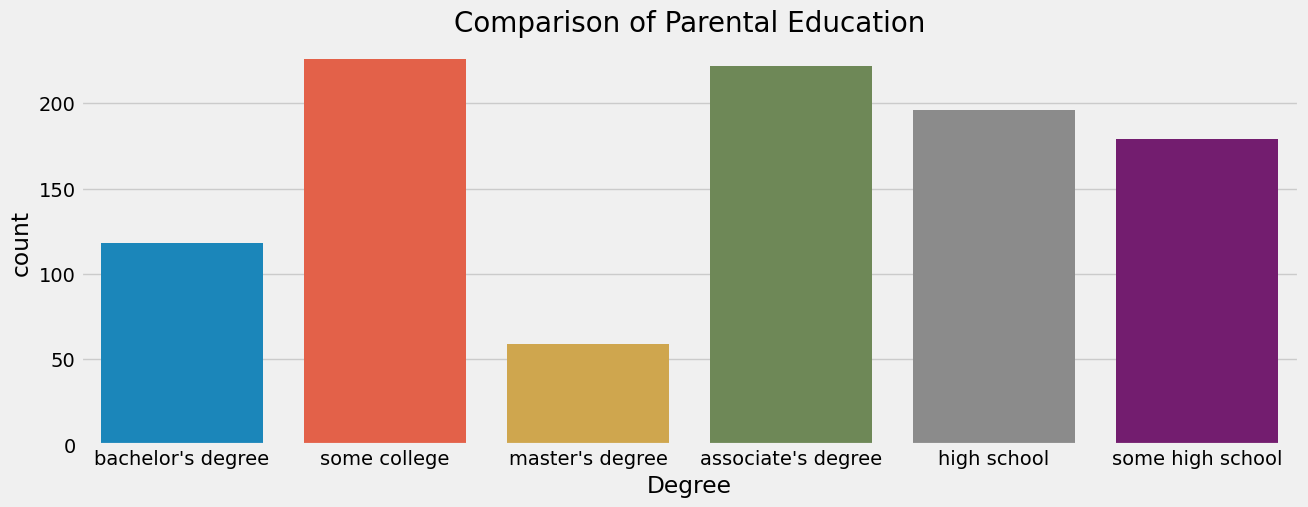

In [476]:
plt.subplots(1,1,figsize=(14,5))
sns.countplot(data = df,
            x = df['parental level of education'])
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

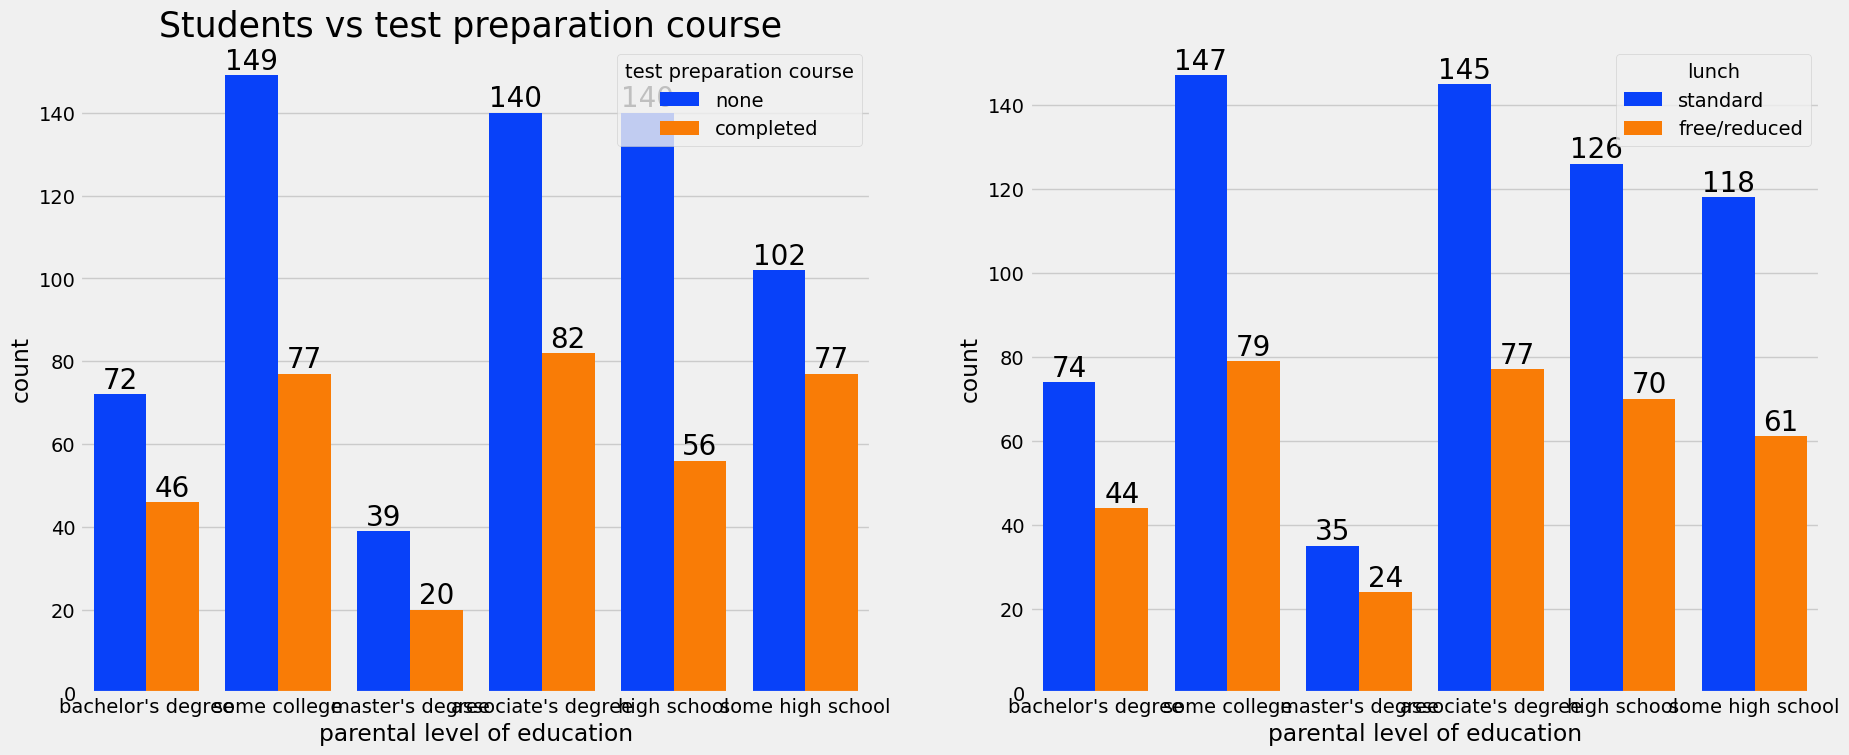

In [481]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)  

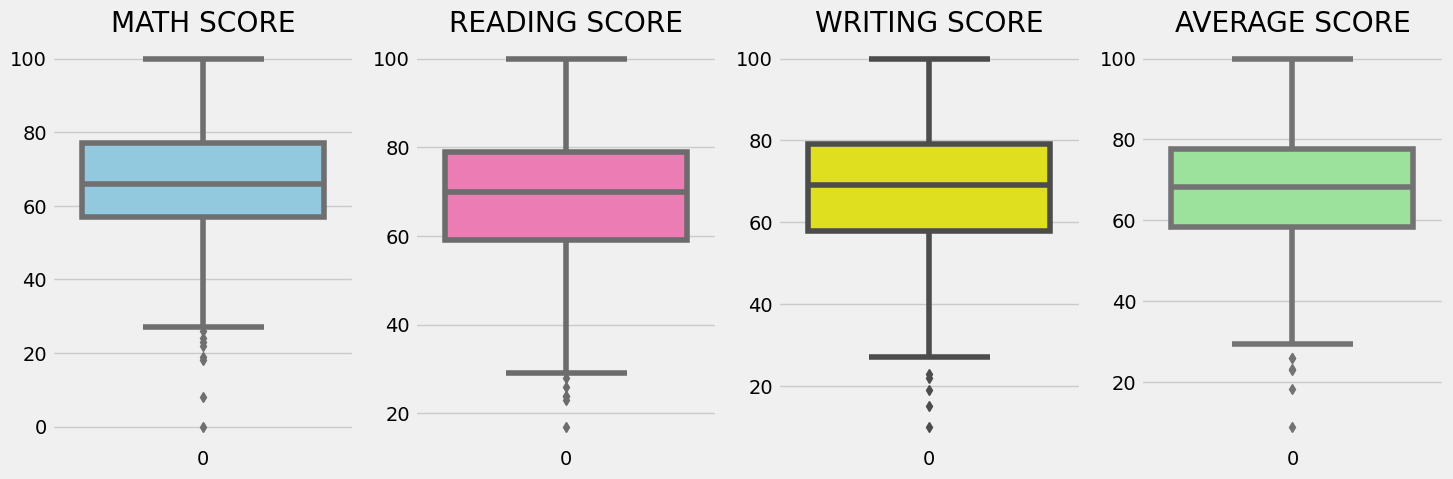

In [485]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
plt.title("MATH SCORE")
sns.boxplot(df['math score'],color='skyblue')

plt.subplot(142)
plt.title("READING SCORE")
sns.boxplot(df['reading score'],color='hotpink')

plt.subplot(143)
plt.title("WRITING SCORE")
sns.boxplot(df['writing score'],color='yellow')

plt.subplot(144)
plt.title("AVERAGE SCORE")
sns.boxplot(df['Average_score'],color='lightgreen')

plt.show()

<Axes: xlabel='lunch', ylabel='writing score'>

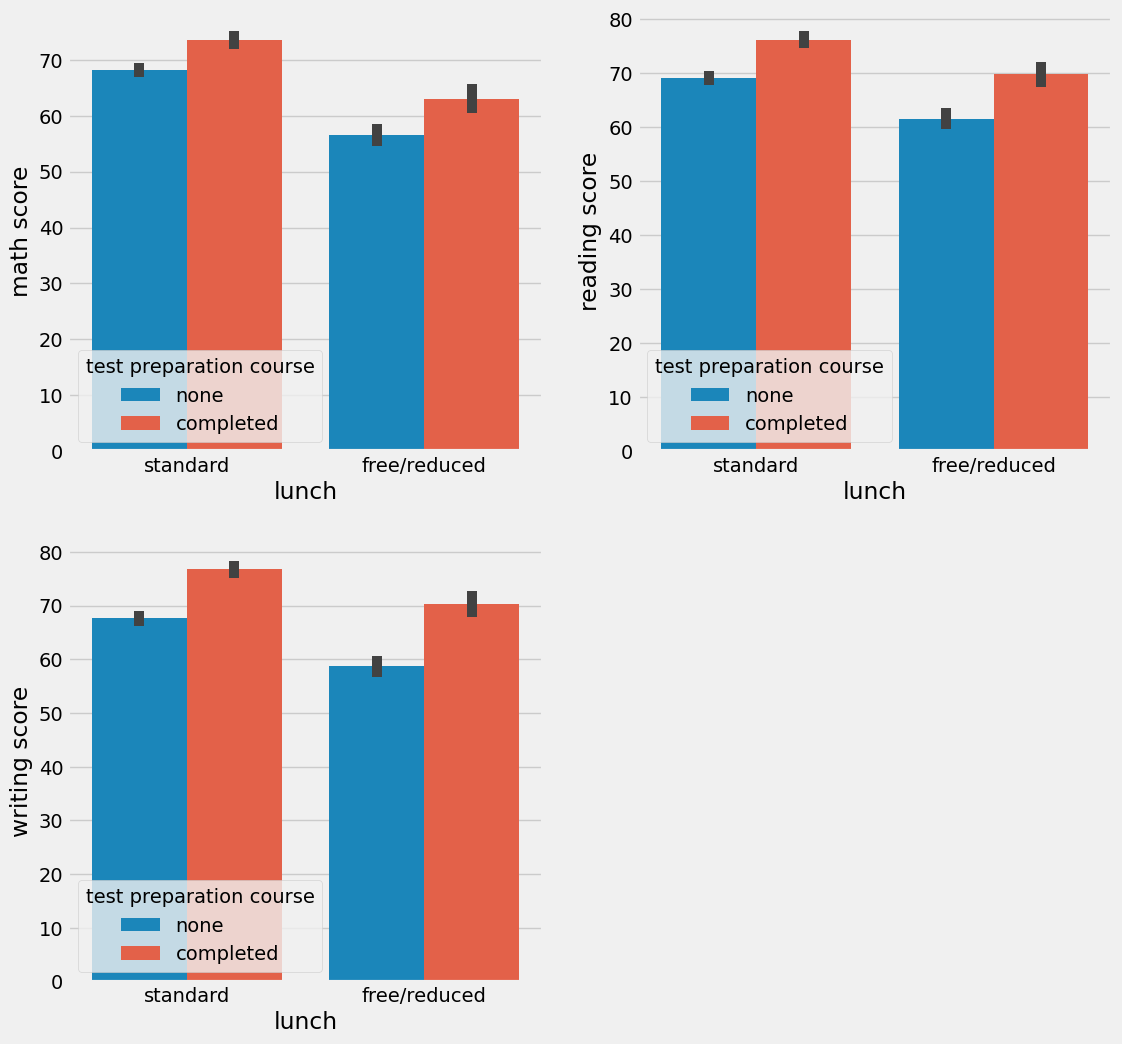

In [488]:
plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])

plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])

plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

CONCLUSION 

> Students performace is related with lunch,parental level of education,race

> females are the top scorers 

> Students performance in any subject is not related much with the test preparation course